### 1. Data Import and EDA

In [ ]:
# Install the required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install the ucimlrepo package to access UCI Machine Learning datasets
pip install ucimlrepo

In [ ]:
# Import the fetch_ucirepo function from the ucimlrepo package
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
mush_features = mushroom.data.features 
mush_class = mushroom.data.targets 

mush_features.head()
  
# # metadata 
# print(mushroom.metadata) 
  
# # variable information 
# print(mushroom.variables) 


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
mush_features.shape, mush_class.shape

mush_features.isnull().sum()

mush_features['stalk-root'].isnull().sum()

# Check the distribution of the 'stalk-root' feature
mush_features['stalk-root'].value_counts()


stalk-root
b    3776
e    1120
c     556
r     192
Name: count, dtype: int64

In [ ]:
# Impute missing values in 'stalk-root' with the mode of the column
mush_features['stalk-root'].fillna(mush_features['stalk-root'].mode()[0], inplace=True)

# Verify that there are no more missing values
mush_features['stalk-root'].isnull().sum()

C:\Users\aishw\AppData\Local\Temp\ipykernel_26228\1664562484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mush_features['stalk-root'].fillna(mush_features['stalk-root'].mode()[0], inplace=True)


### 2. Pre-process Data for Model 

In [ ]:
# split the dataset into training and testing sets - 80% training and 20% testing, no stratification as e to p ratio is almost equal
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mush_features, mush_class, test_size=0.2, random_state=42)

y_train = y_train['poisonous'].values
y_test = y_test['poisonous'].values
y_train.shape, y_test.shape 

((6499,), (1625,))

In [25]:
# One hot encode the categorical features
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
one_hot = OneHotEncoder(drop = 'first', sparse_output=False)

# Fit and transform the training data
X_train_encoded = one_hot.fit_transform(X_train)

# Convert the encoded data back to a DataFrame for better readability and add feature names
X_train_encoded = pd.DataFrame(X_train_encoded, columns=one_hot.get_feature_names_out())

# Tranform the test data
X_test_encoded = one_hot.transform(X_test)

# Convert the encoded test data back to a DataFrame for better readability and add feature names
X_test_encoded = pd.DataFrame(X_test_encoded, columns=one_hot.get_feature_names_out())

X_train_encoded.shape, X_test_encoded.shape


((6499, 94), (1625, 94))

In [34]:
# Label encode the target variable 
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder 
lab_encoder = LabelEncoder()

# Fit and transform the training target variable
y_train_encoded = lab_encoder.fit_transform(y_train)

# Transform the test target variable
y_test_encoded = lab_encoder.transform(y_test)

lab_encoder.classes_

array(['e', 'p'], dtype=object)

### 3. Create and Train Netural Network Model

In [35]:
## NN with 2 layers 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate the Sequential model
model = Sequential()

# Add the first hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation = 'relu', input_dim = X_train_encoded.shape[1]))

# Add output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation = 'sigmoid'))

# Compile model and show the summary
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6080      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,145
Trainable params: 6,145
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Train the model 
hist = model.fit(X_train_encoded, y_train_encoded, epochs = 10, batch_size=100, validation_split=0.2)

Epoch 1/10
52/52 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.0060 - val_accuracy: 0.9985
Epoch 2/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 0.0051 - val_accuracy: 0.9985
Epoch 3/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.0043 - val_accuracy: 0.9985
Epoch 4/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 5/10
52/52 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 6/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 7/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 8/10
52/52 [==

### Neural Network Model Results 

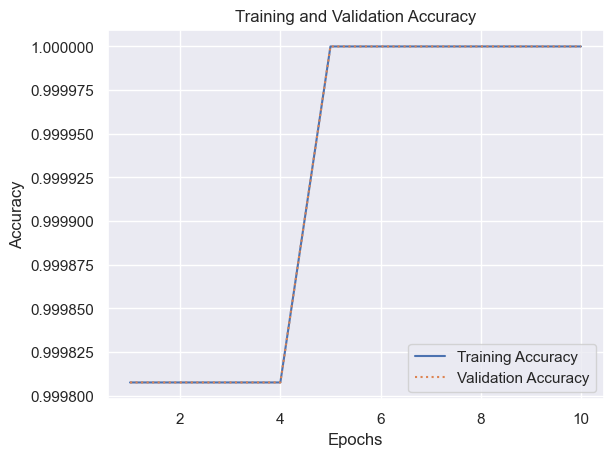

In [41]:
# Plot the training and validation accuracy and loss 

import matplotlib.pyplot as plt 
import seaborn as sns 

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, '-', label = 'Training Accuracy')
plt.plot(epochs, acc, ':', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()



51/51 [==============================] - 0s 1ms/step


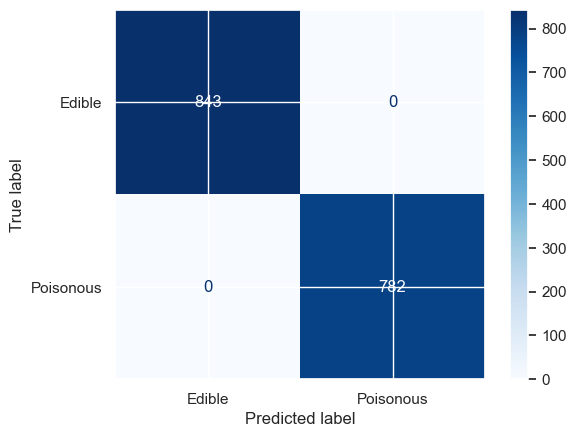

F1 Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [44]:
# Build confusion matrix to evaluate the model performance on the test set
from sklearn.metrics import ConfusionMatrixDisplay as cmd 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Make predictions on the test set and create confusion matrix
y_pred = model.predict(X_test_encoded) > 0.5
labels = ['Edible', 'Poisonous']
cmd.from_predictions(y_test_encoded, y_pred, cmap='Blues', display_labels=labels)
plt.show()

# Calculate and print evaluation metrics
print("F1 Score:", f1_score(y_test_encoded, y_pred))
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Precision:", precision_score(y_test_encoded, y_pred))
print("Recall:", recall_score(y_test_encoded, y_pred))


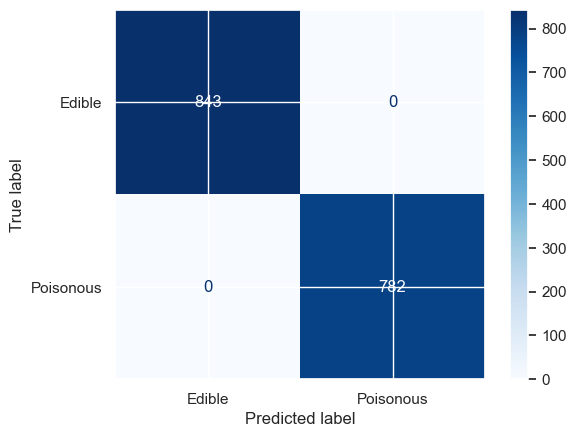

F1 Score (RF): 1.0
Accuracy (RF): 1.0
Precision (RF): 1.0
Recall (RF): 1.0


In [58]:
# Random forest classifier for comparison
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_encoded, y_train_encoded)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_encoded)

# Create confusion matrix for Random Forest model
cmd.from_predictions(y_test_encoded, y_pred_rf, cmap='Blues', display_labels=labels)
plt.show()

# Calculate and print evaluation metrics for Random Forest model
print("F1 Score (RF):", f1_score(y_test_encoded, y_pred_rf))
print("Accuracy (RF):", accuracy_score(y_test_encoded, y_pred_rf))
print("Precision (RF):", precision_score(y_test_encoded, y_pred_rf))
print("Recall (RF):", recall_score(y_test_encoded, y_pred_rf))

In [59]:
# compare the performance of the two models
print("\nComparison of Model Performance:")
print(f"Neural Network - F1 Score: {f1_score(y_test_encoded, y_pred):.4f}, Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}, Precision: {precision_score(y_test_encoded, y_pred):.4f}, Recall: {recall_score(y_test_encoded, y_pred):.4f}")
print(f"Random Forest - F1 Score: {f1_score(y_test_encoded, y_pred_rf):.4f}, Accuracy: {accuracy_score(y_test_encoded, y_pred_rf):.4f}, Precision: {precision_score(y_test_encoded, y_pred_rf):.4f}, Recall: {recall_score(y_test_encoded, y_pred_rf):.4f}")




Comparison of Model Performance:
Neural Network - F1 Score: 1.0000, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
Random Forest - F1 Score: 1.0000, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000


#### Save Neural Network Model as .h5

In [48]:
# Save model 
model.save("mushroom_pred_model.h5")